Enter a mass:  1
Enter a spring constant:  .3
Enter a damping force value:  2
Enter a driving force constant:  1


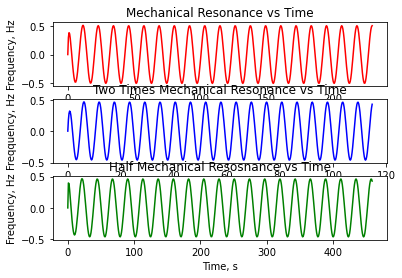

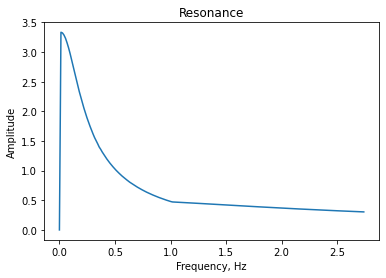

In [1]:
### Project 3: Resonance

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# constants deermined by input
# has try / catch to not break the program if wrong input is used

while True:
    try:
        m = float(input("Enter a mass: "))  # mass
        k = float(input("Enter a spring constant: "))  # spring constant
        c = float(input("Enter a damping force value: "))  # damp force
        F0 = float(input("Enter a driving force constant: "))  # driving force
        break
    except ValueError:
        print ("Please enter a valid number...")

initials = [0, 0]  # initial array to use for odeint
omega0 = np.sqrt(k/m)  # angular frequency
t0 = 0  # initial time
t_inc = 500  # points between start to finish
t0 = 0

# these take care of the time for each variable, period times 2
t_max_full = (40*np.pi/omega0)
t_max_half = (20*np.pi/omega0)
t_max_double = (80*np.pi/omega0)

# time increments for odeint
t_steps1 = np.linspace(0, t_max_full, t_inc)
t_steps2 = np.linspace(0, t_max_half, t_inc)
t_steps3 = np.linspace(0, t_max_double, t_inc)

# functions to use for odeint calculation, one for resonance, one for
# double the resonance and one for half the resonance


def res_full(yLF, tF):
    x = yLF[0]
    v = yLF[1]
    return (v, ((F0*(np.cos(omega0*tF)) - (c)*v - (k*x))/m))


def res_double(yLF, tF):
    x = yLF[0]
    v = yLF[1]
    return (v, ((F0*(np.cos(2*omega0*tF)) - (c)*v - (k*x))/m))


def res_half(yLF, tF):
    x = yLF[0]
    v = yLF[1]
    return (v, ((F0*(np.cos((omega0*tF/2)) - (c)*v - (k*x))/m)))


def resonance(yLF, tF):
    x = yLF[0]
    v = yLF[1]
    return (v, ((F0*(np.cos((frequencies[count-1]*tF)) - (c)*v - (k*x))/m)))


# odeint solutions for the 3 differential equation values of resonance
sol_full = odeint(res_full, initials, t_steps1)
sol_double = odeint(res_double, initials, t_steps2)
sol_half = odeint(res_half, initials, t_steps3)

# while loops that counts over an array of frequncies and calculates
# resonance for the resosnance plot
# separate odeint used here from the others with different arguments and
# variables

count = 1
max_list = [0]
frequencies = np.linspace(0, 5*omega0, 200)

while count < 200:
    tmax_res = (40*np.pi)/frequencies[count]
    t_steps_res = np.linspace(0, tmax_res, t_inc)
    sol_res = odeint(resonance, initials, t_steps_res)
    sol_res_values = sol_res[-100:, ]
    max_amps = np.max(sol_res_values)
    max_list.append(max_amps)
    count += 1

# These take care of the plotting
plt.subplot(311)
plt.plot(t_steps1, sol_full[:, 1], 'r-')
plt.xlabel("Time, s")
plt.ylabel("Frequency, Hz")
plt.title("Mechanical Resonance vs Time")

plt.subplot(312)
plt.plot(t_steps2, sol_double[:, 1], 'b-')
plt.xlabel("Time, s")
plt.ylabel("Freqquency, Hz")
plt.title("Two Times Mechanical Resonance vs Time")

plt.subplot(313)
plt.plot(t_steps3, sol_half[:, 1], 'g-')
plt.xlabel("Time, s")
plt.ylabel("Frequency, Hz")
plt.title("Half Mechanical Resosnance vs Time")
#plt.savefig("oscillations.pdf")
plt.show()
plt.clf()

plt.plot(frequencies, max_list, '-')
plt.ylabel("Amplitude")
plt.xlabel("Frequency, Hz")
plt.title("Resonance")
#plt.savefig("resonance.pdf")
plt.show()
